In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

In [2]:
# Following the turtorial @ https://bioinformatics-core-shared-training.github.io/linear-models-r/anova.html
# In Python though!

In [3]:
diet = pd.read_csv("./anova-diet.csv", index_col = 0, names = ["gender", "age", "height", "diet_type", "initial_weight", "final_weight"], header = 0)

In [4]:
diet.head()

,gender,age,height,diet_type,initial_weight,final_weight
1,Female,22,159,A,58,54.2
2,Female,46,192,A,60,54.0
3,Female,55,170,A,64,63.3
4,Female,33,171,A,64,61.1
5,Female,50,170,A,65,62.2


In [5]:
diet.shape

(76, 6)

In [6]:
# The data set contains information on 76 people who undertook one of three diets (referred to as diet A, B and C).
# There is background information such as age, gender, and height. 
# The aim of the study was to see which diet was best for losing weight.

In [7]:
# Compute the weight loss

diet.loc[:, "wloss"] = diet.initial_weight - diet.final_weight
diet

,gender,age,height,diet_type,initial_weight,final_weight,wloss
1,Female,22,159,A,58,54.2,3.8
2,Female,46,192,A,60,54.0,6.0
3,Female,55,170,A,64,63.3,0.7
4,Female,33,171,A,64,61.1,2.9
5,Female,50,170,A,65,62.2,2.8
...,...,...,...,...,...,...,...
74,Male,35,183,C,83,80.2,2.8
75,Male,49,177,C,84,79.9,4.1
76,Male,28,164,C,85,79.7,5.3
77,Male,40,167,C,87,77.8,9.2


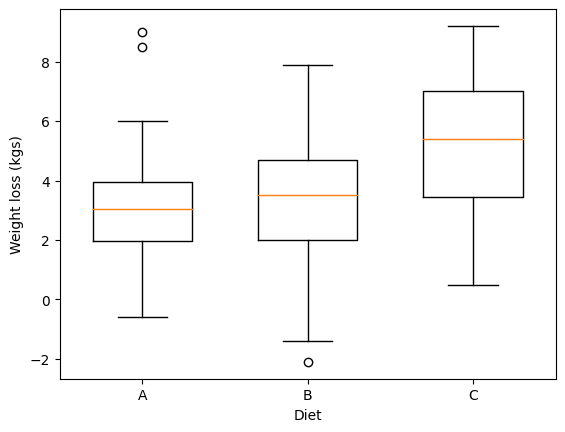

In [8]:
fig, axes = plt.subplots()
axes.boxplot([diet.wloss[diet.diet_type == 'A'], diet.wloss[diet.diet_type == 'B'], diet.wloss[diet.diet_type == 'C']],
            labels = ['A', 'B', 'C'], widths = 0.6)
axes.set_xlabel("Diet")
axes.set_ylabel("Weight loss (kgs)")
plt.show()

In [9]:
# variance is given as,

# ___$v(x) = \frac{\sum{(x - \bar{x})^2}}{n - 1}$___

In [10]:
# The numerator is called the sum of squared differences
# Sum of squares total is,

# ___$SST = \sum{(x - \bar{x})^2}$___

In [11]:
# First step in ANOVA is to cumpute the variability in our feature! i.e the numerator of the variance equation.

sum((diet.wloss - diet.wloss.mean()) ** 2)

470.9288157894734

In [12]:
# Now, we'll consider the categories!

diet.loc[:, ["diet_type", "wloss"]].groupby("diet_type").describe()

wloss                                                 
          count      mean       std  min    25%   50%   75%  max
diet_type                                                       
A          24.0  3.300000  2.240148 -0.6  1.975  3.05  3.95  9.0
B          25.0  3.268000  2.464535 -2.1  2.000  3.50  4.70  7.9
C          27.0  5.148148  2.395568  0.5  3.450  5.40  7.00  9.2

In [13]:
# There are considerable differences between the means of the three diet categories.

In [14]:
# The question one way ANOVA asks is whether there's a difference between the three diet categories?

# one way ANOVA splits the variation in the whole feature (SST) into SST within groups and SST between groups.
# For the SST within A category,

# Here, we sum the squares of differences between the values in category A and the mean of the values in category A.
# That gives the variation within category A!

# ___$SS_w = \sum{(x_A - \bar{x}_A)^2}$___

In [15]:
ssw_a = sum((diet.wloss[diet.diet_type == 'A'] - diet.wloss[diet.diet_type == 'A'].mean()) ** 2)
ssw_b = sum((diet.wloss[diet.diet_type == 'B'] - diet.wloss[diet.diet_type == 'B'].mean()) ** 2)
ssw_c = sum((diet.wloss[diet.diet_type == 'C'] - diet.wloss[diet.diet_type == 'C'].mean()) ** 2)

ssw_a, ssw_b, ssw_c

(115.41999999999989, 145.77440000000007, 149.20740740740726)

In [16]:
# For the SST between the three categories,
# Here we sum the squares of differences between the means of each category and the mean of the feature as a whole, multiplied by the number
# of values in that category!.

# This gives the variation between the categories.

# ___$SS_b = \sum{n_{cat}(\bar{x}_{cat} - \hat{x}_{global})^2}$___

In [17]:
glob_mean = diet.wloss.mean()

mean_a = diet.wloss[diet.diet_type == 'A'].mean()
mean_b = diet.wloss[diet.diet_type == 'B'].mean()
mean_c = diet.wloss[diet.diet_type == 'C'].mean()

na = sum(diet.diet_type == 'A')
nb = sum(diet.diet_type == 'B')
nc = sum(diet.diet_type == 'C')

ncats = np.array([na, nb, nc], dtype = np.int64)
catmeans = np.array([mean_a, mean_b, mean_c], dtype = np.float64)

ncats, catmeans

(array([24, 25, 27], dtype=int64), array([3.3       , 3.268     , 5.14814815]))

In [18]:
# Sum of squares of the differences between the means of the categories and the global mean, multiplied by the category sizes.

ssq_between = sum(ncats * ((catmeans - glob_mean) ** 2))
ssq_between

60.527008382066214

In [19]:
# Sum of the sum of squares within each of the three categories.

ssq_within = ssw_a + ssw_b + ssw_c
ssq_within

410.4018074074072

In [20]:
# In our dataset, there's varaition within and between the categories!
# Now, are these differences statistically significant?

In [21]:
# Total sum of squared differences is actually equal to the sum of squared differences within the categories + 
# sum of squared differences between the categories

ssq_global = sum((diet.wloss - glob_mean) ** 2)
ssq_global

470.9288157894734

In [22]:
ssq_between + ssq_within

470.92881578947345

In [23]:
# WOW!
# THIS WILL ALWAYS BE TRUE!

## ___F test___
-----------

In [24]:
# Now we need to decide whether the sum of squared differences between categories is big enough to claim that there indeed is a 
# statistically significant difference beyween the group means!

# This is where the F test comes into the scene.

# ___$F = \frac{MS_b}{MS_w}$___

In [25]:
# MS_b (the numerator) is the mean of the sum of squared difference between groups.
# i.e the mean of; (NOT THE ARITHMETIC MEAN!)

ncats * ((catmeans - glob_mean) ** 2)

array([10.01721607, 11.49388428, 39.01590804])

In [26]:
# MS_w (the denominator) is the mean of the sum of squared differences within groups.
# i.e the mean of; (NOT THE ARITHMETIC MEAN!)

ssw_a, ssw_b, ssw_c

(115.41999999999989, 145.77440000000007, 149.20740740740726)

In [27]:
# THESE MEANS ARE COMPUTED BY DIVIDING THE SUM OF SQUARED DIFFERENCES BY THEIR RESPECTIVE DEGREES OF FREEDOM!

In [28]:
# In other words,

# ___$F = \frac{(\frac{SS_b}{c - 1})}{(\frac{SS_w}{N - c})}$___

In [29]:
# Where c is the number of categories.
# N is the number of elements in of our feature.

In [30]:
(ssq_between / (3 - 1))

30.263504191033107

In [31]:
ssq_within / (diet.wloss.size - 3)

5.621942567224756

In [32]:
fstat = (ssq_between / (3 - 1)) / (ssq_within / (diet.wloss.size - 3))
fstat

5.38310447485993

In [33]:
# The higher the deviation between the means of the categories, the larger the F statistic will tend to be!

In [34]:
# EVERYTHING IS CORRECT UNTIL THIS POINT.

## ___Hypotheses___
-----------

In [35]:
# Null hypothesis: 

# ___$\mu_A = \mu_B = \mu_C$___

In [36]:
# The higher the F statistic is, the morelikely we are to reject the Null hypothesis.
# Moving to p values,

In [40]:
# dfn -> numerator's degrees of freedom.
# dfd -> denominator's degrees of freedom.

p = 2 * (1 - f.cdf(fstat, dfn = 2, dfd = diet.wloss.size - 3))
p

0.01319170621733945

In [38]:
diet.wloss.size - 3

73

------------------------------
------------------------------